In [1]:
# Consider the Bertrand paradox.

# For each of the three cases, generate a sample of 100 elements (chords) and compute the ratio of the chords bigger
# than the side of the equilateral triangle inscribed in the circle.

# The circle radius is equal with 1 and the set of chords will contain the carthesian coordinates of the edges of the 
# chords. The origin of the coordinate system is in the origin of the circle.

# Draw using matplotlib each set of chords for each case respectively.


# ------------------------------------------------------------------------------------------------------------------


# Consider an equilateral triangle inscribed in a circle. Suppose a chord of the circle is chosen at random. 
# What is the probability that the chord is longer than a side of the triangle?
# Bertrand gave three arguments (each using the principle of indifference), all apparently valid, yet yielding 
# different results:

#       1) The "random endpoints": 
#             Choose two random points on the circumference of the circle and draw the chord
#             joining them. To calculate the probability in question, imagine the triangle is rotated so its 
#             vertex coincides with one of the chord endpoints. Observe that if the other chord endpoint lies 
#             on the arc between the endpoints of the triangle side opposite the first point, the chord is 
#             longer than a side of the triangle. The length of the arc is 1/3 of the circumference of the 
#             circle, therefore the probability that a random chord is longer than a side of the inscribed 
#             triangle is 1/3.

#       2) The "random radial point" method: 
#             Choose a radius of the circle, choose a point on the radius and construct the chord through 
#             this point and perpendicular to the radius. To calculate the probability in question, imagine
#             the triangle rotated so a side is perpendicular to the radius. The chord is longer than a side 
#             of the triangle if the chosen point is nearer the center of the circle than the point where the 
#             side of the triangle intersects the radius. The side of the triangle bisects the radius, therefore 
#             the probability a random chord is longer than a side in the inscribed triangle is 1/2/

#       3) The "random midpoint" method:
#             Choose a point anywhere within the circle and construct a chord with the chosen point as its 
#             midpoint. The chord is longer than a side of the inscribed triangle if the chosen point falls 
#             within a concentric circle of radius 1/2 the radius of the larger circle. The area of the smaller
#             circle is 1/4 of the area of the larger ircle, therefore the probability a random chord is longer
#             than a side of the inscribed triangle is 1/4.

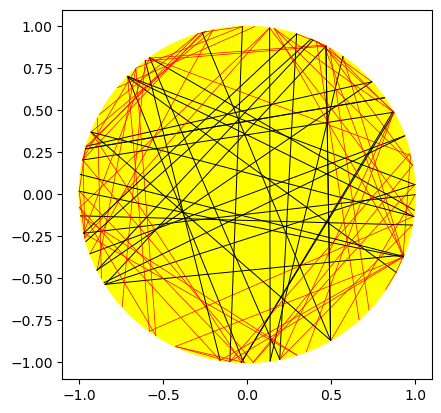

FIRST CASE - ratio:  0.35


In [4]:
# CASE 1
# random endpoints

import numpy as np 
import matplotlib.pyplot as plt


figure, axes = plt.subplots()                        # create a figure and a set of subplots
circle = plt.Circle((0, 0), 1, color = 'yellow')     # circle of radius = 1, centered at the origin

axes.add_patch(circle)   # this line plots the yellow circle
axes.set_aspect(1)       # this makes the shape a circle and not an oval
axes.plot()              # autoscale update


# plot 100 points on the circle
points = np.zeros(100, dtype = object)
index = 0
for index in range(100):
    theta = 2 * np.pi * np.random.rand()   # random angle
    x0 = np.cos(theta)                     # x coordinate of the random point
    y0 = np.sin(theta)                     # y coordinate of the random point
    point = (x0, y0)                       # point created by the 2 coordinates
    points[index] = point
    plt.plot(x0, y0)                       # plot the newly generated point
    

# equilateral triangle inscribed in the circle
# lenght of a side is 3 * radius / sqrt(3)
side = 3 / np.sqrt(3)                    
counter = 0

for index in range(100):
    a,b = np.random.choice(points, 2, replace = False)          # choose 2 random points from the ones generated
    x = [a[0], b[0]]     # first random point
    y = [a[1], b[1]]     # second random point
    
    length = np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)   # length of the chord between those points
    
    if length > side:             # if the length of the chord is greater that the side of the triangle,
        counter = counter + 1     # increment the counter
        plt.plot(x, y, color = "black", linewidth = 0.7)  # plot the chords that are longer than a side in black
    else:
        plt.plot(x, y, color = "red", linewidth = 0.5)    # plot the chords that are shorter than a side in red
    
plt.show()
ratio = counter / 100
print("FIRST CASE - ratio: ", ratio)

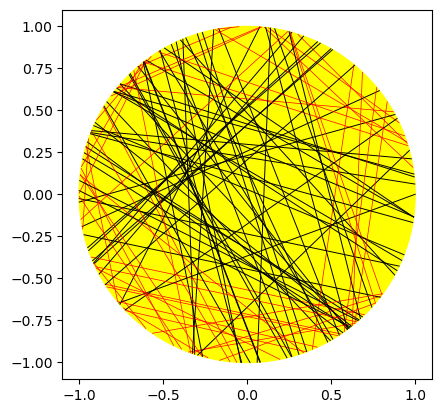

SECOND CASE - ratio:  0.57


In [18]:
# CASE 2
# random radial point

import numpy as np 
import matplotlib.pyplot as plt


figure, axes = plt.subplots()                         # create a figure and a set of subplots
circle = plt.Circle((0 , 0), 1, color = 'yellow')     # circle of radius = 1, centered at the origin

axes.add_patch(circle)    # this line plots the yellow circle
axes.set_aspect(1)        # this line makes it a circle (without it, it's an oval)
axes.plot()               # autoscale update


# plot 100 points on the circle
points = np.zeros(100, dtype = object)
index = 0
for index in range(100):
    theta = 2 * np.pi * np.random.rand()    # random angle
    x0 = np.cos(theta)                      # x coordinate of the random point
    y0 = np.sin(theta)                      # y coordinate of the random point
    point = (x0, y0)                        # point created by the 2 coordinates
    points[index] = point
    plt.plot(x0, y0)                        # plot the newly generated point
    
    
# equilateral triangle inscribed in the circle
# lenght of a side is 3 * radius / sqrt(3)
side = 3 / np.sqrt(3)          
counter = 0

for index in range(100):
    # A(xa, ya) random point on the circumference that will determine the random radius
    a = np.random.choice(points, 1, replace = False)[0]
    x = [a[0], 0]
    y = [a[1], 0]
        
    # D(xd, yd) will be a random point on the radius OA
    xd = np.random.uniform(low = 0, high = a[0], size = 1)[0]
    yd = (a[1] / a[0]) * xd 
    
    # perpendicular line
    slope = (-1 * a[0]) / a[1]   # slope 
    aux = yd + xd ** 2 / yd
    
    A = slope ** 2 + 1      # coefficient for second degree equation to find intersection points 
    B = 2 * slope * aux     # of the circle and the perpendicular line 
    C = aux ** 2 - 1
    
    discr = (B ** 2) - (4 * A * C)  # delta
    
    xp1 = (-B + np.sqrt(discr)) / (2 * A)   # first result
    xp2 = (-B - np.sqrt(discr)) / (2 * A)   # second result
    
    yp1 = slope * xp1 + aux     # y coordinate obtained from x and the slope for first point
    yp2 = slope * xp2 + aux     # y coordinate obtained from x and the slope for second point
    
    length = np.sqrt((xp1 - xp2) ** 2 + (yp1 - yp2) ** 2)     # length of the chord
    
    if length > side:            # if the length of the chord is greater than the side of the triangle,
        counter = counter + 1    # increment the counter
        plt.plot([xp1, xp2], [yp1, yp2], color = "black", linewidth = 0.7)   # black for bigger chords
    else:
        plt.plot([xp1, xp2], [yp1, yp2], color = "red", linewidth = 0.5)     # red for shorter chords
        
plt.show()
ratio = counter / 100
print("SECOND CASE - ratio: ", ratio)

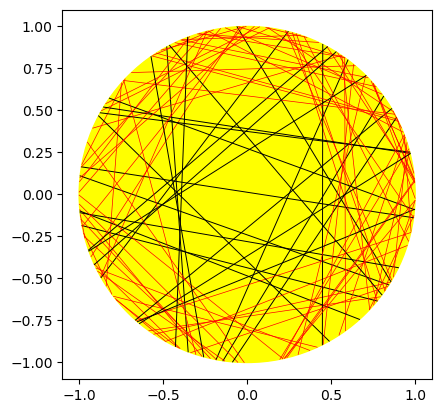

THIRD CASE - ratio:  0.25


In [17]:
# CASE 3
# random midpoint

import numpy as np 
import matplotlib.pyplot as plt


figure, axes = plt.subplots()                       # create a figure and a set of subplots
circle = plt.Circle((0, 0), 1, color = 'yellow')    # circle of radius = 1, centered at the origin

axes.add_patch(circle)   # plot the yellow shape
axes.set_aspect(1)       # make it a circle, not an oval
axes.plot()              # autoscale update


# equilateral triangle inscribed in the circle
# lenght of a side is 3 * radius / sqrt(3)
side = 3 / np.sqrt(3)   
counter = 0

index = 0
for index in range(100):
    # generate 100 points inside the circle
    theta = 2 * np.pi * np.random.rand()      # random angle
    r = np.sqrt(np.random.rand())             # random positioning or radius
    # sqrt has to do with the average distance between points

    xp = r * np.cos(theta)
    yp = r * np.sin(theta)    
    
    # perpendicular line
    slope = (-1 * xp) / yp   # slope 
    aux = yp + xp ** 2 / yp
    
    A = slope ** 2 + 1       # coefficient for second degree equation to find intersection points 
    B = 2 * slope * aux      # of the circle and the perpendicular line 
    C = aux ** 2 - 1
    
    discr = (B ** 2) - (4 * A * C)   # delta
    
    xa = (-B + np.sqrt(discr)) / (2 * A)   # first result
    xb = (-B - np.sqrt(discr)) / (2 * A)   # second result
    
    ya = slope * xa + aux     # y coordinate obtained from x and the slope for first point
    yb = slope * xb + aux     # y coordinate obtained from x and the slope for second point
    
    length = np.sqrt((xa - xb) ** 2 + (ya - yb) ** 2)      # length of the chord
    
    if length > side:            # if the length of the chord is greater than the side of the triangle,
        counter = counter + 1    # incrememnt the counter
        plt.plot([xa, xb], [ya, yb], color = "black", linewidth = 0.7)   # black for bigger chords
    else:
        plt.plot([xa, xb], [ya, yb], color = "red", linewidth = 0.5)   # red for shorter chords
    
plt.show()
ratio = counter / 100
print("THIRD CASE - ratio: ", ratio)